In [99]:
# Solution to MNIST Digit Classifier challenge on Kaggle (https://www.kaggle.com/c/digit-recognizer)
# Implemented a 2 layer Neural Net using TF Keras library
# Author: Tushar Mittal (@techytushar)

In [100]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [86]:
#loading the train and test dataset
train_data = pd.read_csv('all/train.csv')
test_data = pd.read_csv('all/test.csv')
#converting pandas dataframe into array
train_data = train_data.values
test_data = test_data.values

In [87]:
#preprocess the data
test_data = test_data/255
X = train_data[:,1:]
X = X/255
Y = train_data[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)
m_train = X_train.shape[0]
m_test = X_test.shape[0]
n = X.shape[1]
Y_train = Y_train.reshape(m_train,1)
Y_test = Y_test.reshape(m_test,1)

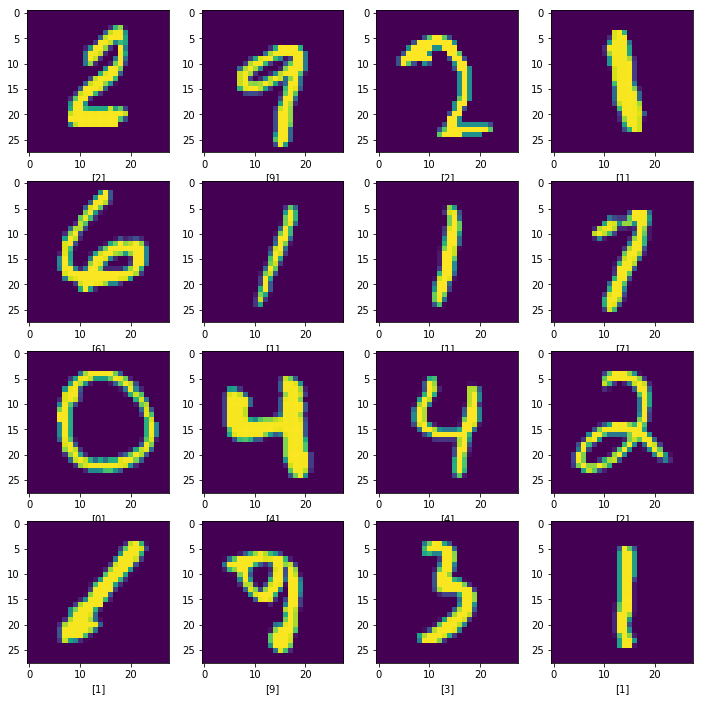

In [77]:
#visualizing some digits
fig = plt.figure(figsize=(12,12))
for i in range(1,17):
    fig.add_subplot(4,4,i)
    plt.imshow(X_train[i*15,:].reshape(28,28))
    plt.xlabel(Y_train[i*15])
plt.show()

In [88]:
#defining the model
model = keras.Sequential([
    keras.layers.Dense(128, activation = tf.nn.relu, input_shape=(n,)),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
#compiling the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
#training the model
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
37800/37800 [==============================] - 3s 84us/step - loss: 0.3073 - acc: 0.9122
Epoch 2/5
37800/37800 [==============================] - 3s 76us/step - loss: 0.1396 - acc: 0.9590
Epoch 3/5
37800/37800 [==============================] - 3s 78us/step - loss: 0.0961 - acc: 0.9717
Epoch 4/5
37800/37800 [==============================] - 3s 76us/step - loss: 0.0716 - acc: 0.9778
Epoch 5/5
37800/37800 [==============================] - 3s 75us/step - loss: 0.0534 - acc: 0.9841


In [102]:
#Evaluating the performance of model
score = model.evaluate(X_test,Y_test)
print(f"Neural Net achieved an accuracy of {score[1]*100}%")

4200/4200 [==============================] - 0s 44us/step
Neural Net achieved an accuracy of 97.28571428571429%


In [103]:
#making predictions and generating CSV file for submission
predictions = model.predict_classes(test_data)
data = {
    "ImageId":np.arange(1,28001),
    "Label":predictions
}
out = pd.DataFrame(data=data)
out.to_csv('result.csv',encoding='utf-8', columns=['ImageId','Label'], index=False)